In [1]:
import sys,os
from math import *
from pathlib import Path

import h5py
import numpy as np
from numpy import square as sqr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from copy import deepcopy
#import foxlink
from foxlink import fp_graphs as fpg
from foxlink.fp_graphs import graph_vs_time, graph_xl_dens
import importlib
#importlib.reload(foxlink.FP_analysis)
from foxlink.FP_analysis import FPAnalysis, LineDataUnits

In [2]:
def fp_graph_all_data_2d(fig, n, axarr, FP_anal):
        
        params = FP_anal._params
        # Clean up if lines
        if not FP_anal.init_flag:
            for ax in axarr.flatten():
                ax.clear()
            for artist in fig.gca().lines + fig.gca().collections:
                artist.remove()
                del artist

        # Draw rods
        L1 = params["L1"]
        L2 = params["L2"]
        lw = params['rod_diameter']
        if hasattr(FP_anal, 'phi_arr') and not hasattr(FP_anal, 'R1_vec'):
            hphi = FP_anal.phi_arr[n] * .5
            line1 = LineDataUnits((0, L1 * np.cos(hphi)),
                                       (0, L1 * np.sin(hphi)),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:green', clip_on=False)
            LineDataUnits((0, L2 * np.cos(hphi)),
                                       (0, -L2 * np.sin(hphi)),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:purple', clip_on=False)
            axarr[0].add_line(line1)
            axarr[0].add_line(line2)
        elif hasattr(FP_anal, 'R_arr'):
            r = FP_anal.R_arr[n, :]
            line1 = LineDataUnits((-.5 * L1, .5 * L1),
                                       (0, 0),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:green', clip_on=False)
            line2 = LineDataUnits((-.5 * L1 + r[0], .5 * L1 + r[0]),
                                       (r[1], r[1]),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:purple', clip_on=False)
            axarr[0].add_line(line1)
            axarr[0].add_line(line2)
        else:
            # r = self.R_arr[n, :]
            r1 = FP_anal.R1_pos[n]
            r2 = FP_anal.R2_pos[n]
            u1 = FP_anal.R1_vec[n]
            u2 = FP_anal.R2_vec[n]

            line1 = LineDataUnits((-.5 * L1 * u1[1] + r1[1],
                                        .5 * L1 * u1[1] + r1[1]),
                                       (-.5 * L1 * u1[2] + r1[2],
                                        .5 * L1 * u1[2] + r1[2]),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:green', clip_on=False)
            axarr[0].add_line(line1)
            line2 = LineDataUnits((-.5 * L2 * u2[1] + r2[1],
                                        .5 * L2 * u2[1] + r2[1]),
                                       (-.5 * L2 * u2[2] + r2[2],
                                        .5 * L2 * u2[2] + r2[2]),
                                       linewidth=lw, solid_capstyle='round',
                                       color='tab:purple', clip_on=False)
            axarr[0].add_line(line2)
            r1 = FP_anal.R1_pos
            r2 = FP_anal.R2_pos
            u1 = FP_anal.R1_vec
            u2 = FP_anal.R2_vec

            max_x = np.amax(.5 * L1 * u1[:, 1] + r1[:, 1])
            max_x = max(max_x, np.amax(.5 * L2 * u2[:, 1] + r2[:, 1])) * 1.25
            min_x = np.amin(-.5 * L1 * u1[:, 1] + r1[:, 1])
            min_x = min(min_x, np.amin(-.5 * L2 * u2[:, 1] + r2[:, 1])) * 1.25
            max_y = max_x
            min_y = min_x

            axarr[0].set_xlim(min_x, max_x)
            axarr[0].set_ylim(min_y, max_y)
            axarr[0].set_xlabel(r'x (nm)')
            axarr[0].set_ylabel(r'y (nm)')
            axarr[1].set_xlabel(
                'Head distance from \n center of MT$_1$ $s_1$ (nm)')
            axarr[1].set_ylabel(
                'Head distance from \n center of MT$_2$ $s_2$ (nm)')
           
            axarr[2].set_xlabel(r'Time (sec)')
            axarr[2].set_ylabel(r'Crosslinker number')
            axarr[2].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[2].set_ylim(np.amin(FP_anal.Nxl_arr),
                                 np.amax(FP_anal.Nxl_arr))
            
            axarr[3].set_xlabel(r'Time (sec)')
            axarr[3].set_ylabel(r'Total crosslinker force (pN)')
            axarr[3].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[3].set_ylim(np.amin(FP_anal.force_arr),
                                 np.amax(FP_anal.force_arr))
            
            axarr[4].set_xlabel(r'Time (sec)')
            axarr[4].set_ylabel(r'Total crosslinker torque (pN*nm)')
            axarr[4].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[4].set_ylim(np.amin(FP_anal.torque_arr),
                                 np.amax(FP_anal.torque_arr))
            
            axarr[5].set_xlabel(r'Time (sec)')
            axarr[5].set_ylabel('Distance between MTs \n centers of mass (nm)')
            axarr[5].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[5].set_ylim(np.amin(FP_anal.dR_arr),
                                 np.amax(FP_anal.dR_arr))
            
            axarr[6].set_xlabel(r'Time (sec)')
            axarr[6].set_ylabel('Angle between MT \n orientation vectors (rad)')
            axarr[6].set_xlim(left=0, right=FP_anal.time[-1])
            axarr[6].set_ylim(np.amin(FP_anal.phi_arr),
                                 np.amax(FP_anal.phi_arr))

        # Make density plot
        c = graph_xl_dens(axarr[1],
                          FP_anal.xl_distr[:, :, n],
                          FP_anal.s1,
                          FP_anal.s2,
                          max_dens_val=FP_anal.max_dens_val)
        if FP_anal.init_flag:
            fig.colorbar(c, ax=axarr[1])
            #fig.tight_layout()
            axarr[0].set_aspect(1.0)
            FP_anal.init_flag = False
        graph_vs_time(axarr[2], FP_anal.time, FP_anal.Nxl_arr, n)
        graph_vs_time(axarr[3],FP_anal.time, FP_anal.force_arr, n)
        graph_vs_time(axarr[4], FP_anal.time, FP_anal.torque_arr, n)
        graph_vs_time(axarr[5], FP_anal.time, FP_anal.dR_arr, n)
        graph_vs_time(axarr[6], FP_anal.time, FP_anal.phi_arr, n)
        axarr[2].legend(["N({:.2f}) = {:.1f}".format(FP_anal.time[n], FP_anal.Nxl_arr[n])])
        axarr[3].legend(["F({:.2f}) = {:.1f} Pn".format(FP_anal.time[n], FP_anal.force_arr[n])])
        axarr[4].legend(["$\tau$({:.2f}) = {:.1f} Pn*nm".format(FP_anal.time[n], FP_anal.torque_arr[n])])
        axarr[5].legend(["$\Delta$R({:.2f}) = {:.1f} nm".format(FP_anal.time[n], FP_anal.dR_arr[n])])
        axarr[6].legend(["$\phi$({:.2f}) = {:.1f} rad".format(FP_anal.time[n], FP_anal.phi_arr[n])])
        #t1 = time.time()
        #print("Graph ", n, "made in: ", t1 - t0)
        return fig.gca().lines + fig.gca().collections

# Testing

In [3]:
A = np.asarray([[1,0,0],[1,0,0],[1,1,0],[1,0,0]])
B = np.asarray([[1,0,0],[2,1,0],[3,4,0],[5,0,0]])

In [4]:
print(np.einsum('ij,ij->i', A, B))

[1 2 7 5]


## Moments

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


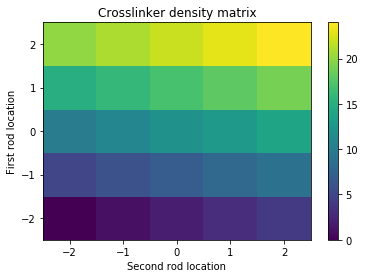

In [26]:
# Build uniform distribution
C = np.arange(25).reshape(5,5)
print(C)
ds = 1.0
s = np.linspace(-2., 2, 5)
s_cen = np.append(s,s[-1]+ds)-.5*ds
c = plt.pcolormesh(s_cen, s_cen, C)
plt.title("Crosslinker density matrix")
plt.ylabel("First rod location")
plt.xlabel("Second rod location")
plt.colorbar(c)

In [6]:
# First moments
p1_mat = np.einsum('ij,i->ij',C,s)*ds*ds
P1 = np.einsum('ij,i->',C,s)*ds*ds
p2_mat = np.einsum('ij,j->ij',C,s)*ds*ds
P2 = np.einsum('ij,j->',C,s)*ds*ds

print(p1_mat)
print("First moment:", P1)
print(p2_mat)
print("Second moment:", P2)


[[ 0. -2. -4. -6. -8.]
 [-5. -6. -7. -8. -9.]
 [ 0.  0.  0.  0.  0.]
 [15. 16. 17. 18. 19.]
 [40. 42. 44. 46. 48.]]
First moment: 250.0
[[  0.  -1.   0.   3.   8.]
 [-10.  -6.   0.   8.  18.]
 [-20. -11.   0.  13.  28.]
 [-30. -16.   0.  18.  38.]
 [-40. -21.   0.  23.  48.]]
Second moment: 50.0


First moment is higher than second moment because differences between ends of rods are greater for the first rod variable

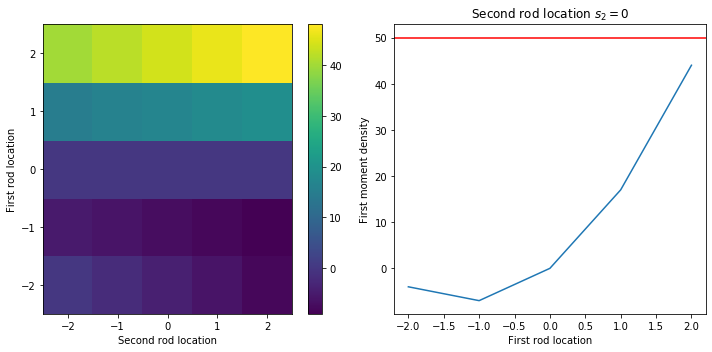

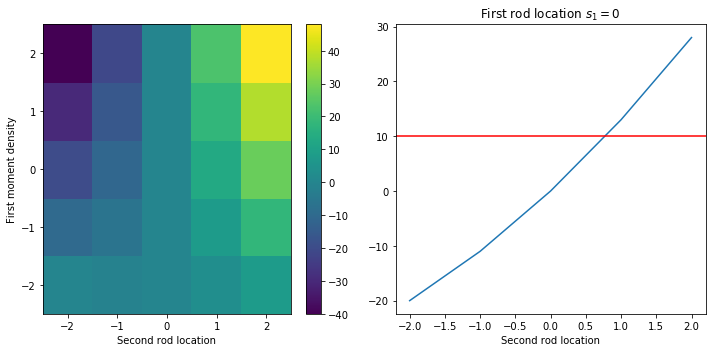

In [20]:
# Plotting first and second moments
fig1, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
c = ax0.pcolormesh(s_cen,s_cen,p1_mat)
fig1.colorbar(c, ax=ax0)
ax1.plot(s,C[:,2]*s)
ax1.axhline(np.sum(C[:,2]*s),c='r')
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_title("Second rod location $s_2 = 0$")
ax1.set_ylabel("First moment density")
ax1.set_xlabel("First rod location")
plt.tight_layout()

fig2, (ax2, ax3) = plt.subplots(1,2, figsize=(10,5))
c = ax2.pcolormesh(s_cen, s_cen,p2_mat)
fig2.colorbar(c, ax=ax2)
ax3.plot(s,C[2,:]*s)
ax3.axhline(np.sum(C[2,:]*s),c='r')
ax2.set_ylabel("First rod location")
ax2.set_xlabel("Second rod location")
ax3.set_title("First rod location $s_1 = 0$")
ax2.set_ylabel("First moment density")
ax3.set_xlabel("Second rod location")
plt.tight_layout()

In [12]:
# Second moments
s_sqr = s*s
u11_mat = np.einsum('ij,i,j->ij',C,s,s)*ds*ds
u20_mat = np.einsum('ij,i->ij',C,s_sqr)*ds*ds
u02_mat = np.einsum('ij,j->ij',C,s_sqr)*ds*ds
u11 = np.einsum('ij->',u11_mat)
u20 = np.einsum('ij->',u20_mat)
u02 = np.einsum('ij->',u02_mat)
print("u11:", u11)
print("u20:", u20)
print("u02:", u02)

u11: 0.0
u20: 600.0
u02: 600.0


Text(0.5, 0, 'Second rod location')

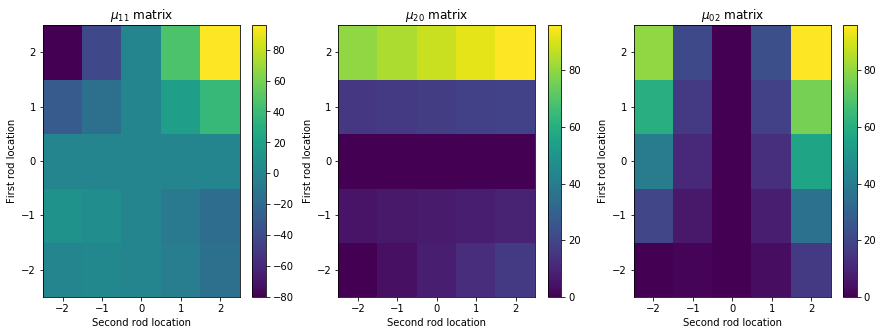

In [23]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15,5))
ax0.set_title('$\mu_{11}$ matrix')
c = ax0.pcolormesh(s_cen,s_cen,u11_mat)
fig.colorbar(c, ax=ax0)
ax1.set_title('$\mu_{20}$ matrix')
c = ax1.pcolormesh(s_cen,s_cen,u20_mat)
fig.colorbar(c, ax=ax1)
ax2.set_title('$\mu_{02}$ matrix')
c = ax2.pcolormesh(s_cen,s_cen,u02_mat)
fig.colorbar(c, ax=ax2)
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_ylabel("First rod location")
ax1.set_xlabel("Second rod location")
ax2.set_ylabel("First rod location")
ax2.set_xlabel("Second rod location")

P1: 250.0
P2: 50.0
u11: 0.0
u20: 600.0
u02: 600.0


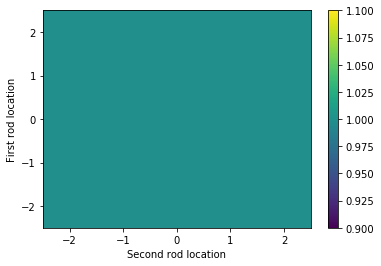

In [25]:
D = np.ones((5,5))
c = plt.pcolormesh(s_cen, s_cen, D)
plt.colorbar(c)
s_sqr = s*s
# First moments
p1_mat1 = np.einsum('ij,i->ij',D,s)*ds*ds
P1_1 = np.einsum('ij,i->',D,s)*ds*ds
p2_mat1 = np.einsum('ij,j->ij',D,s)*ds*ds
P2_1 = np.einsum('ij,j->',D,s)*ds*ds
# Second moments
u11_mat1 = np.einsum('ij,i,j->ij',D,s,s)*ds*ds
u20_mat1 = np.einsum('ij,i->ij',D,s_sqr)*ds*ds
u02_mat1 = np.einsum('ij,j->ij',D,s_sqr)*ds*ds
u11_1 = np.einsum('ij->',u11_mat1)
u20_1 = np.einsum('ij->',u20_mat1)
u02_1 = np.einsum('ij->',u02_mat1)
plt.title("Crosslinker density matrix")
plt.ylabel("First rod location")
plt.xlabel("Second rod location")

print("P1:", P1)
print("P2:", P2)
print("u11:", u11)
print("u20:", u20)
print("u02:", u02)

P1: 0.0
P2: 0.0


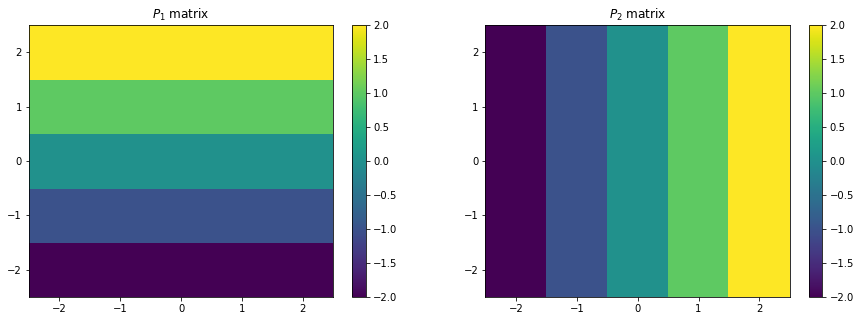

In [17]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,5))
ax0.set_title('$P_{1}$ density matrix')
c = ax0.pcolormesh(s_cen,s_cen,p1_mat1)
fig.colorbar(c, ax=ax0)
ax1.set_title('$P_{2}$ density matrix')
c = ax1.pcolormesh(s_cen,s_cen,p2_mat1)
fig.colorbar(c, ax=ax1)
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_ylabel("First rod location")
ax1.set_xlabel("Second rod location")

print("P1:", P1_1)
print("P2:", P2_1)


u11: 0.0
u20: 600.0
u02: 600.0


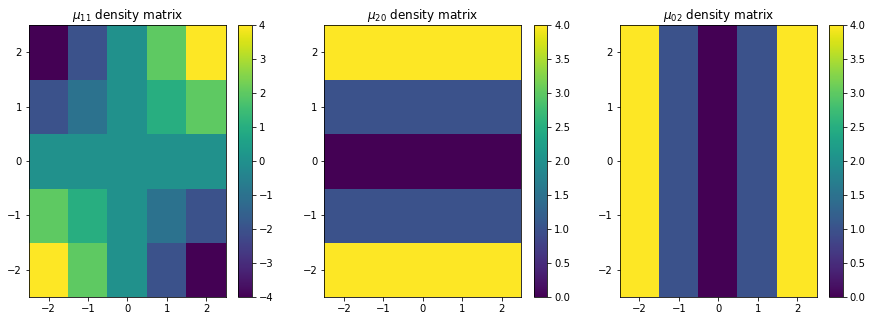

In [21]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15,5))
ax0.set_title('$\mu_{11}$ density matrix')
c = ax0.pcolormesh(s_cen,s_cen,u11_mat1)
fig.colorbar(c, ax=ax0)
ax1.set_title('$\mu_{20}$ density matrix')
c = ax1.pcolormesh(s_cen,s_cen,u20_mat1)
fig.colorbar(c, ax=ax1)
ax2.set_title('$\mu_{02}$ density matrix')
c = ax2.pcolormesh(s_cen,s_cen,u02_mat1)
fig.colorbar(c, ax=ax2)
ax0.set_ylabel("First rod location")
ax0.set_xlabel("Second rod location")
ax1.set_ylabel("First rod location")
ax1.set_xlabel("Second rod location")
ax2.set_ylabel("First rod location")
ax2.set_xlabel("Second rod location")

print("u11:", u11)
print("u20:", u20)
print("u02:", u02)

In [22]:
u11_arr = np.stack((u11, u11_1))
u02_arr = np.stack((u02, u02_1))
u20_arr = np.stack((u20,u20_1))
u_arr = np.stack((u11_arr, u20_arr, u02_arr), axis=-1)
print(u_arr)

[[  0. 600. 600.]
 [  0.  50.  50.]]


# Optical trap graphs

In [ ]:
h5_file = Path('/Users/adamlamson/projects/DATA/XlinkProb/testing/')
FP_anal = FPAnalysis(h5_file)